### Question 1: Apply Hypothesis test to check if AQI of July and August months, all over the world, are significantly different or same (5 marks)

Analysis of variance: The purpose of ANOVA is to test if there is any significant difference between the means of two or more groups. We assume 95% confidence level.



H0 (null hypothesis): μl = p2 = μ3 = = µk (It implies that the means of all the population are equal)

H1 (alternate hypothesis): It states that there will be at least one population mean that differs from the rest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime
from scipy.stats import f_oneway

In [2]:
df=pd.read_csv("data_date.csv")
df.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [3]:
df.describe()

,AQI Value
count,11100.000000
mean,61.883063
std,48.170101
min,1.000000
25%,29.000000
50%,53.000000
75%,83.000000
max,963.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       11100 non-null  object
 1   Country    11100 non-null  object
 2   Status     11100 non-null  object
 3   AQI Value  11100 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 347.0+ KB


In [5]:
df.set_index(df['Date'],inplace=True)
df.drop(['Date'],axis=1,inplace=True)
df.head()

,Country,Status,AQI Value
Date,,,
2022-07-21,Albania,Good,14
2022-07-21,Algeria,Moderate,65
2022-07-21,Andorra,Moderate,55
2022-07-21,Angola,Unhealthy for Sensitive Groups,113
2022-07-21,Argentina,Moderate,63


In [6]:
new_df=df.loc[(df.index>'2022-06-30') & (df.index<'2022-09-01')]
new_df.tail()

,Country,Status,AQI Value
Date,,,
2022-08-31,Uzbekistan,Moderate,99
2022-08-31,Vatican,Good,42
2022-08-31,Venezuela,Good,17
2022-08-31,Vietnam,Unhealthy for Sensitive Groups,107
2022-08-31,Zambia,Unhealthy for Sensitive Groups,138


In [7]:
#Group by
result=new_df.groupby('Country')['AQI Value'].apply(list)
result


Country
Albania       [14, 17, 15, 15, 20, 15, 20, 18, 55, 42, 44, 4...
Algeria       [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...
Andorra       [55, 51, 52, 51, 37, 33, 45, 41, 16, 21, 31, 2...
Angola        [113, 152, 110, 134, 126, 105, 109, 107, 117, ...
Argentina     [63, 61, 53, 61, 58, 49, 62, 42, 74, 35, 43, 3...
                                    ...                        
Uzbekistan    [60, 58, 98, 56, 116, 62, 92, 73, 57, 38, 75, ...
Vatican       [70, 70, 61, 61, 68, 68, 68, 57, 61, 53, 53, 6...
Venezuela     [3, 2, 20, 8, 11, 20, 20, 4, 5, 14, 18, 31, 21...
Vietnam       [43, 41, 76, 61, 119, 87, 119, 92, 84, 60, 88,...
Zambia        [39, 54, 36, 66, 100, 78, 82, 152, 89, 56, 73,...
Name: AQI Value, Length: 142, dtype: object

In [8]:
 #Perform one way ANOVA
f_statistic,p_value = f_oneway(*result)
print("f_statistic: ",f_statistic)
print("p_value: ",p_value)

f_statistic:  120.03230465181719
p_value:  0.0


Conclusion: p=0

Since the p-value is less than 0.05 hence we would reject the H0

In [9]:
print("""Since p value is <0.05, we reject the null hypothesis, so there is a difference
between the mean AQI values of different countries""")

Since p value is <0.05, we reject the null hypothesis, so there is a difference
between the mean AQI values of different countries


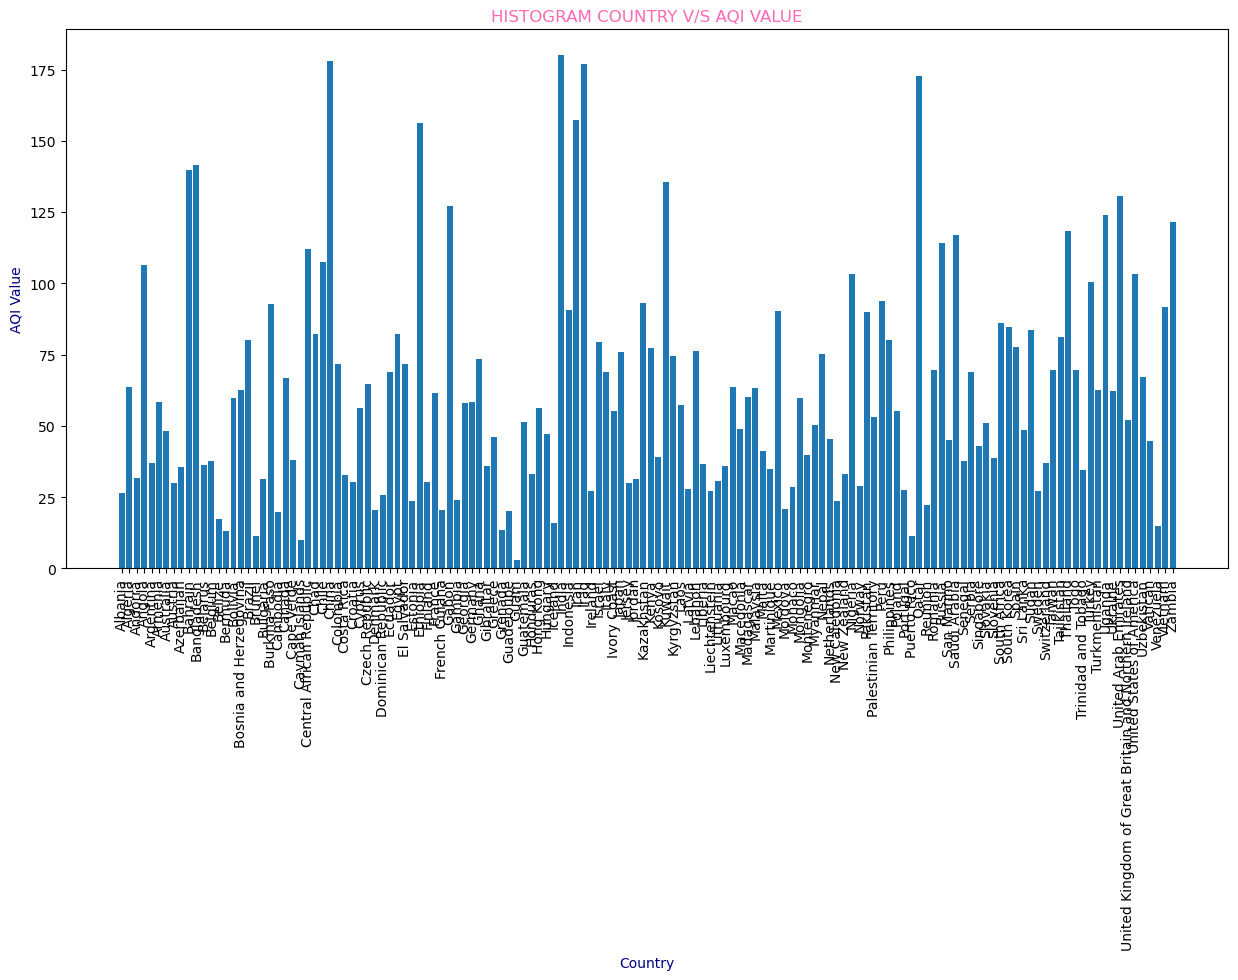

In [10]:
# Draw the histogram
means=df.groupby('Country')['AQI Value'].mean()
plt.figure(figsize=(15,7))
plt.bar(means.index.tolist(),means.values.tolist())
plt.xticks(rotation=90)
plt.title("HISTOGRAM COUNTRY V/S AQI VALUE",color='hotpink')
plt.xlabel("Country",color='navy')
plt.ylabel("AQI Value",color='navy')
plt.show()